In [88]:
import argparse
import glob
import os.path
import pickle as pkl
import warnings
from os.path import join as oj

import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
path_all = '/Users/aubrey/Documents/GitHub/imodels-experiments/results/interactions/cleaned_titanic/train-test/seed0/'

In [20]:
with open(path_all+'HSCART_comparisons.pkl', 'rb') as f:
    results_sorted = [pkl.load(f)]

In [21]:
df = pd.concat([r['df'] for r in results_sorted])
estimators = []
for r in results_sorted:
    estimators += np.unique(r['estimators']).tolist()

output_dict = {
    'estimators': estimators,
    'comparison_datasets': results_sorted[0]['comparison_datasets'],
    'metrics': results_sorted[0]['metrics'],
    'df': df,
}

if 'df_rules' in results_sorted[0]:
    rule_df = pd.concat([r['df_rules'] for r in results_sorted])
    output_dict['df_rules'] = rule_df


In [22]:
output_dict['df']

,max_depth,rocauc_train,accuracy_train,f1_train,recall_train,precision_train,avg_precision_train,best_accuracy_train,rocauc_test,accuracy_test,f1_test,recall_test,precision_test,avg_precision_test,best_accuracy_test,complexity,time,split_seed,estimator
0,1,0.757259,0.775832,0.702326,0.668142,0.740196,0.625904,0.775832,0.789755,0.797203,0.760331,0.718750,0.807018,0.705918,0.797203,1,0.098099,0,HSCART
1,4,0.854117,0.807356,0.707447,0.588496,0.886667,0.800438,0.807356,0.868473,0.762238,0.690909,0.593750,0.826087,0.806259,0.790210,4,0.089516,0,HSCART
2,7,0.865968,0.823117,0.749380,0.668142,0.853107,0.822929,0.823117,0.865803,0.776224,0.703704,0.593750,0.863636,0.808649,0.797203,7,0.091822,0,HSCART
3,10,0.861498,0.812609,0.723514,0.619469,0.869565,0.820052,0.833625,0.878857,0.776224,0.698113,0.578125,0.880952,0.823524,0.811189,10,0.091642,0,HSCART
4,13,0.875343,0.831874,0.758794,0.668142,0.877907,0.840077,0.844133,0.879055,0.783217,0.710280,0.593750,0.883721,0.825376,0.818182,13,0.091062,0,HSCART
5,16,0.897031,0.837128,0.768080,0.681416,0.880000,0.857278,0.847636,0.870451,0.790210,0.722222,0.609375,0.886364,0.827169,0.818182,16,0.093387,0,HSCART
6,21,0.906560,0.863398,0.815166,0.761062,0.877551,0.873676,0.866900,0.864517,0.804196,0.766667,0.718750,0.821429,0.822840,0.804196,21,0.094846,0,HSCART


In [18]:
output_dict['estimators']

['HSCART']

In [13]:
df

,max_depth,rocauc_train,accuracy_train,f1_train,recall_train,precision_train,avg_precision_train,best_accuracy_train,rocauc_test,accuracy_test,f1_test,recall_test,precision_test,avg_precision_test,best_accuracy_test,complexity,time,split_seed,estimator
0,1,0.722679,0.740964,0.656000,0.554054,0.803922,0.644211,0.740964,0.751716,0.738095,0.717949,0.608696,0.875000,0.746894,0.738095,1,0.054514,0,HSCART
1,4,0.906287,0.855422,0.850000,0.918919,0.790698,0.837195,0.855422,0.819222,0.761905,0.782609,0.782609,0.782609,0.834964,0.809524,4,0.055661,0,HSCART
2,7,0.965261,0.933735,0.923077,0.891892,0.956522,0.943265,0.933735,0.835240,0.809524,0.809524,0.739130,0.894737,0.864453,0.809524,7,0.063182,0,HSCART
3,10,0.979436,0.963855,0.957746,0.918919,1.000000,0.976879,0.963855,0.824943,0.785714,0.780488,0.695652,0.888889,0.844584,0.809524,10,0.066271,0,HSCART
4,13,0.993243,0.981928,0.979310,0.959459,1.000000,0.992045,0.981928,0.864989,0.857143,0.863636,0.826087,0.904762,0.877713,0.880952,13,0.074476,0,HSCART
5,16,0.999927,0.993976,0.993197,0.986486,1.000000,0.999820,0.993976,0.829519,0.761905,0.782609,0.782609,0.782609,0.850972,0.809524,16,0.064533,0,HSCART
6,21,0.999412,0.981928,0.979866,0.986486,0.973333,0.999284,0.987952,0.794050,0.738095,0.765957,0.782609,0.750000,0.832174,0.785714,17,0.068940,0,HSCART


In [12]:
from imodels import get_clean_dataset, HSTreeClassifierCV # import any model here

# prepare data (a sample clinical dataset)
X_sample, y_sample, feature_names = get_clean_dataset('csi_pecarn_pred')
X_sample

array([[11.  ,  0.  ,  1.  , ...,  1.  , 11.55,  1.  ],
       [ 8.  ,  1.  ,  1.  , ...,  0.  ,  3.14,  1.  ],
       [ 9.  ,  0.  ,  0.  , ...,  0.  ,  3.88,  1.  ],
       ...,
       [16.  ,  0.  ,  1.  , ...,  0.  ,  8.58,  1.  ],
       [16.  ,  0.  ,  0.  , ...,  0.  ,  4.21,  0.  ],
       [16.  ,  1.  ,  0.  , ...,  0.  ,  2.47,  0.  ]], dtype=float32)

In [13]:
y_sample

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
from imodels import HSTreeClassifierCV, get_clean_dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import shap
# prepare data (in this a sample clinical dataset)
df = pd.read_csv('https://raw.githubusercontent.com/markusloecher/shap/master/Explore/titanicnoMissingAge.csv')
cleaned_titanic = df[['Age', 'Pclass','Sex', 'PassengerId', 'Survived']]
X, y = cleaned_titanic.iloc[:, :-1].values, cleaned_titanic.iloc[:, -1].values
feat_names = cleaned_titanic.columns.values[:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fit the model
rf = RandomForestClassifier(n_estimators=100, random_state=0, # random_state works as random.seed
                            criterion="entropy", max_features=3, min_samples_leaf=20)
model = HSTreeClassifierCV(estimator_=rf)  # Applying HS to tree ensembles
model.fit(X_train, y_train)   # fit model
preds = model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)

# visualize the model
# plot_tree(model.estimator_, feature_names=feat_names)


In [83]:
preds

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [61]:
rf.fit(X_train, y_train)
explainer_original = shap.Explainer(rf)
shap_values_original = explainer_original(X_train)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [71]:
shap_values_original[:,:,0].shape

(478, 4)

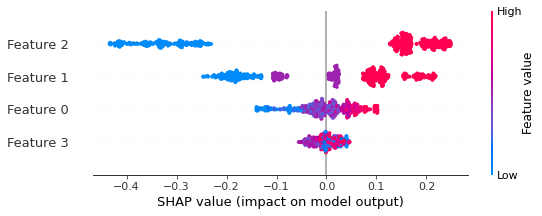

In [64]:
shap.summary_plot(shap_values_original[:,:,0], X_train)

In [72]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model).fit(X, y)
eli5.show_weights(perm) 

LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
HAMMING is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.HAMMING instead.
HAMMING is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.HAMMING instead.
BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resamplin

Weight,Feature
0.2129 ± 0.0261,x2
0.0835 ± 0.0139,x1
0.0126 ± 0.0085,x0
0.0098 ± 0.0066,x3


In [82]:
model.predict

<bound method HSTree.predict of <imodels.tree.hierarchical_shrinkage.HSTreeClassifierCV object at 0x7ff683056a60>>

In [66]:

# X_sample = shap.sample(X, 100)
explainer = shap.KernelExplainer(model.predict,X_train)
# shap_values = explainer(X)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

Using 478 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [67]:
shap_values = explainer.shap_values(X_train)

  0%|          | 0/478 [00:00<?, ?it/s]`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0%|          | 

In [70]:
shap_values.shape

(478, 4)

In [76]:
np.sum(abs(shap_values),axis=0)

array([ 33.67050209,  63.42468619, 152.26917713,   5.89016736])

In [81]:
np.sum(abs(shap_values_original[:,:,0].values),axis=0)

array([ 19.37395578,  57.85782418, 112.9022617 ,   8.90859104])

In [80]:
shap_values_original[:,:,0].values

array([[-0.00904181,  0.08425794,  0.14250658, -0.03837322],
       [-0.04451224, -0.18381531, -0.31726687, -0.01195728],
       [ 0.06199582,  0.11166514,  0.16668291,  0.03416762],
       ...,
       [ 0.01484114, -0.18220935, -0.34097069,  0.00086385],
       [ 0.03797701,  0.11774904,  0.15647402, -0.00803235],
       [ 0.04197933,  0.09510433,  0.16184596, -0.0014702 ]])

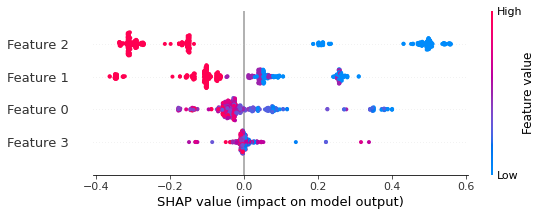

In [69]:
shap.summary_plot(shap_values, X_train)

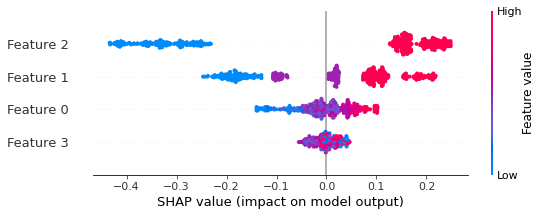

In [65]:
shap.summary_plot(shap_values_original[:,:,0], X_train)